In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
plt.style.use('default') # 使用默认样式

import pickle
from scipy.interpolate import griddata


In [3]:
data = pd.read_excel('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/Coords/05_.xlsx')
data.head()


,Node ID,X,Y,X_def,Y_def,Unnamed: 5,Node ID_el,elements
0,1.0,0.0,22.0,4.210000e-34,2.200000e+01,NaN,1,1
1,2.0,0.0,20.0,2.510000e-34,2.000000e+01,NaN,1,365
2,3.0,6.0,16.0,6.000000e+00,1.600000e+01,NaN,2,1
3,4.0,8.0,18.0,8.000000e+00,1.800000e+01,NaN,3,5
4,5.0,10.0,0.0,1.000000e+01,-9.200000e-35,NaN,3,6


In [19]:
# print(data['elements'])
node_coords = data.loc[:, ['X', 'Y']]
node_coords = np.array(node_coords.dropna())
# print(node_coords)
element_num = max(data['elements'])
element_nodes = {}
for i in data['elements']:
    element_nodes[i-1] = []
print(element_nodes)
for idx, element in enumerate(data['elements']):
    element_nodes[element-1].append(data['Node ID_el'][idx]-1)
sorted_element_nodes = {key: element_nodes[key] for key in sorted(element_nodes)}

element_nodes = []
for key in sorted_element_nodes.keys():
    element_nodes+=sorted_element_nodes[key]

element_nodes = np.array(element_nodes)
print(element_nodes)
saved_data =(node_coords, element_nodes) 
# Save using pickle
with open("Coords/saved_data.pkl", "wb") as file:
    pickle.dump(saved_data, file)

{0: [], 364: [], 4: [], 5: [], 150: [], 305: [], 360: [], 14: [], 15: [], 29: [], 164: [], 165: [], 174: [], 314: [], 315: [], 319: [], 1: [], 2: [], 3: [], 361: [], 362: [], 363: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 30: [], 45: [], 60: [], 75: [], 90: [], 105: [], 120: [], 135: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 44: [], 59: [], 74: [], 89: [], 104: [], 119: [], 134: [], 149: [], 163: [], 175: [], 162: [], 185: [], 161: [], 195: [], 160: [], 205: [], 159: [], 215: [], 158: [], 225: [], 157: [], 235: [], 156: [], 245: [], 155: [], 255: [], 154: [], 265: [], 153: [], 275: [], 152: [], 285: [], 151: [], 295: [], 166: [], 167: [], 168: [], 169: [], 170: [], 171: [], 172: [], 173: [], 184: [], 194: [], 204: [], 214: [], 224: [], 234: [], 244: [], 254: [], 264: [], 274: [], 284: [], 294: [], 304: [], 313: [], 320: [], 312: [], 325: [], 311: [], 330: [], 310: [], 335: [], 309: [], 340: [], 308:

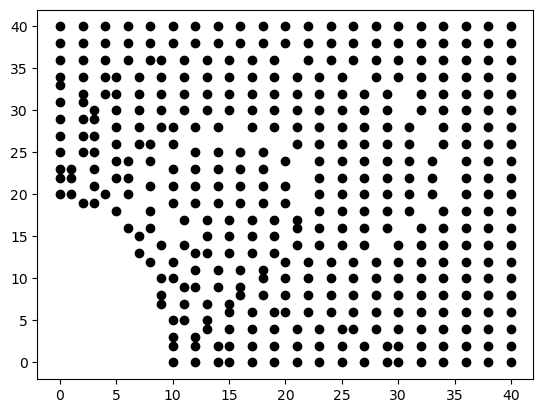

In [5]:
for node in node_coords:
    # print(node)
    plt.scatter(node[0], node[1], c='black')

In [24]:
with open("Coords/saved_data.pkl", "rb") as file:
    nodes_coord, element_nodes = pickle.load(file)
nodes_coord

array([[ 0., 22.],
       [ 0., 20.],
       [ 6., 16.],
       [ 8., 18.],
       [10.,  0.],
       [12.,  0.],
       [40.,  0.],
       [40., 20.],
       [40., 40.],
       [10., 40.],
       [ 0., 40.],
       [ 1., 20.],
       [ 2., 19.],
       [ 3., 19.],
       [ 5., 18.],
       [ 6., 20.],
       [ 4., 20.],
       [ 3., 21.],
       [ 1., 22.],
       [ 7., 15.],
       [ 7., 13.],
       [ 8., 12.],
       [ 9., 10.],
       [ 9.,  8.],
       [ 9.,  7.],
       [10.,  5.],
       [10.,  3.],
       [10.,  2.],
       [12.,  2.],
       [12.,  3.],
       [11.,  5.],
       [11.,  7.],
       [11.,  9.],
       [10., 10.],
       [10., 12.],
       [ 9., 14.],
       [ 8., 16.],
       [14.,  0.],
       [15.,  0.],
       [17.,  0.],
       [19.,  0.],
       [21.,  0.],
       [23.,  0.],
       [25.,  0.],
       [27.,  0.],
       [29.,  0.],
       [30.,  0.],
       [32.,  0.],
       [34.,  0.],
       [36.,  0.],
       [38.,  0.],
       [40.,  2.],
       [40.,

[[  0   1  11  18]
 [ 11  12  17  18]
 [ 12  13  16  17]
 ...
 [ 16  17 404 405]
 [ 17  18 405 406]
 [  0  18 118 406]]
0 [ 0. 22.] [0.   0.27] [1, -1] le
1 [ 0. 20.] [0.   0.27] [1, -1] le
2 [ 6. 16.] [-0.14  0.13] [0, 0] center
3 [ 8. 18.] [-0.14 -0.02] [0, 0] center
4 [10.  0.] [-0.41  0.  ] [-1, 1] be
5 [12.  0.] [-0.43  0.  ] [-1, 1] be
6 [40.  0.] [-0.22  0.  ] [-1, 1] rbc
7 [40. 20.] [-0.24 -0.22] [-1, -1] re
8 [40. 40.] [-0.05 -0.12] [-1, -1] rtc
9 [10. 40.] [0.1  0.23] [-1, -1] te
10 [ 0. 40.] [0.   0.25] [1, -1] ltc
11 [ 1. 20.] [-0.01  0.25] [0, 0] center
12 [ 2. 19.] [-0.03  0.25] [0, 0] center
13 [ 3. 19.] [-0.03  0.24] [0, 0] center
14 [ 5. 18.] [-0.09  0.18] [0, 0] center
15 [ 6. 20.] [-0.03  0.18] [0, 0] center
16 [ 4. 20.] [-0.01  0.25] [0, 0] center
17 [ 3. 21.] [-0.   0.2] [0, 0] center
18 [ 1. 22.] [0.01 0.27] [0, 0] center
19 [ 7. 15.] [-0.25 -0.04] [0, 0] center
20 [ 7. 13.] [-0.27 -0.08] [0, 0] center
21 [ 8. 12.] [-0.22 -0.06] [0, 0] center
22 [ 9. 10.] [-0.2   

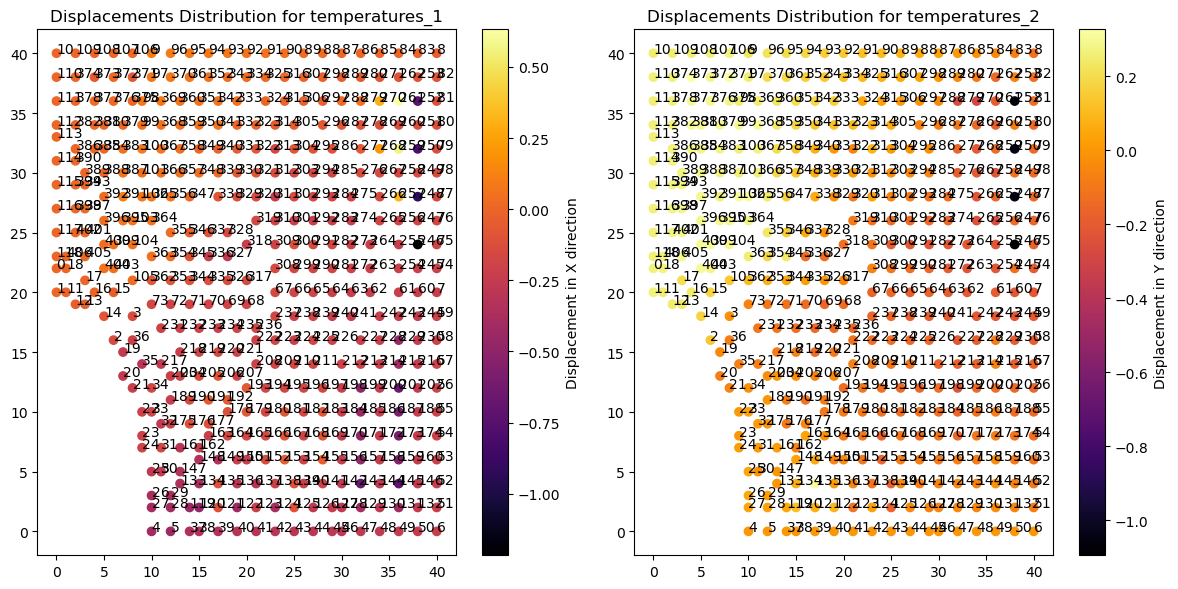

In [34]:
from tools_2D import *
from shape_fns import *
from Elements import *
from Energy import *
from Mesh import create_mesh, Boundary
def FEM(a_b, mesh_size, mesh_shape, GPN=2, show=False):
    Load_x = 50  # N/mm
    Load_y = 0  # N/mm
    A = 40  # mm^2
    # nodes_coord,  element_nodes = create_mesh(a_b, mesh_shape, mesh_size)
    with open("Coords/saved_data.pkl", "rb") as file:
       nodes_coord, element_nodes = pickle.load(file)

    nodes_list = Boundary(nodes_coord, a_b)

    element_list = []
    if mesh_shape == 0:
        element_nodes = element_nodes.reshape(-1, 3)
    elif mesh_shape == 1:
        element_nodes = element_nodes.reshape(-1, 4)
    print(element_nodes)

    for ele_lst in element_nodes:
        this_nodes = [
        node for id in ele_lst for node in nodes_list if node.id == id]
        try:
            elem = Q4(this_nodes, GPN=GPN)
        except:
            elem = T3(this_nodes, GPN=GPN)
        elem.a_b = a_b
        element_list.append(elem)
    DOFs = 2*len(nodes_list)
    glo_K = np.zeros((DOFs, DOFs))
    glo_F = np.zeros(DOFs)

    for elem in element_list:  # Assemble Force vector
        loc_F = elem.F
        for i, node_i in enumerate(elem.nodes):
            global_dof = 2 * node_i.id
            if abs(node_i.xy[0]-40) < 1e-3:
                # print(node_i.id)
                glo_F[global_dof] += Load_x * loc_F[0]
                glo_F[global_dof + 1] += Load_y * loc_F[1]

    for elem in element_list:  # Assemble Stiffness matrix
        loc_K = elem.K
        for i, node_i in enumerate(elem.nodes):
            for j, node_j in enumerate(elem.nodes):
                for dof_i in range(2):  # 每个节点的dof: 0和1
                    for dof_j in range(2):
                        # 计算全局dof的位置
                        global_dof_i = 2 * node_i.id + dof_i
                        global_dof_j = 2 * node_j.id + dof_j

                        # 组装到全局矩阵
                        glo_K[global_dof_i][global_dof_j] += loc_K[2 *
                                                                   i + dof_i][2*j + dof_j]
    for elem in element_list:  # Boundary condition
        for i, node_i in enumerate(elem.nodes):
            for dof_i in range(2):  # 每个节点的dof: 0和1 (x和y方向)
                global_dof_i = 2 * node_i.id + dof_i

                # 检查迪里希莱边界条件
                if node_i.BC[dof_i] == 1:
                    # 修改刚度矩阵和载荷向量
                    # print(node_i.id, global_dof_i, node_i.BC)

                    glo_K[global_dof_i, :] = 0
                    glo_K[:, global_dof_i] = 0
                    glo_K[global_dof_i, global_dof_i] = 1e5  # 大数约束
                    glo_F[global_dof_i] = 0

    np.set_printoptions(precision=2, suppress=True)
    glo_K[np.abs(glo_K) < 1e-5] = 0
    U = np.linalg.solve(glo_K, glo_F)
    # print(U)
    for id in range(len(nodes_list)):
        displacement = np.array([U[id*2], U[id*2+1]])
        nodes_list[id].value = displacement
    for node in nodes_list:
        print(node.id, node.xy, node.value, node.BC, node.type)
    if show == True:

        x_coords = [node.xy[0] for node in nodes_list]
        y_coords = [node.xy[1] for node in nodes_list]
        temperatures_1 = [node.value[0] for node in nodes_list]
        temperatures_2 = [node.value[1] for node in nodes_list]

        # 创建散点图
        # 创建新的图形
        plt.figure(figsize=(12, 6))

        # 创建左侧子图
        plt.subplot(1, 2, 1)
        plt.scatter(x_coords, y_coords, c=temperatures_1, cmap='inferno')
        plt.colorbar(label='Displacement in X direction')
        plt.title('Displacements Distribution for temperatures_1')
        for (x, y), node in zip(nodes_coord, nodes_list):
            plt.text(x, y, node.id)  # 在指定的坐标处显示文本

        # 创建右侧子图
        plt.subplot(1, 2, 2)
        plt.scatter(x_coords, y_coords, c=temperatures_2, cmap='inferno')  # 注意这里使用了temperatures_2
        plt.colorbar(label='Displacement in Y direction')
        plt.title('Displacements Distribution for temperatures_2')
        for (x, y), node in zip(nodes_coord, nodes_list):
            plt.text(x, y, node.id)  # 在指定的坐标处显示文本

        plt.tight_layout()  # 确保子图之间的间距合适
        plt.show()
    return U, nodes_coord, copy.deepcopy(element_list)
U, nodes_list, elements_list = FEM(0.5, 2, 1, 2, True)

[[155 162 163 159]
 [129 159 163 160]
 [147 160 163 161]
 ...
 [153 175 432 407]
 [143 407 432 182]
 [151 182 432 416]]
392
0 [10.  0.] [0.02 0.  ] [-1, 1] be
1 [ 0. 20.] [ 0.   -0.01] [1, -1] le
2 [ 0. 40.] [ 0.   -0.01] [1, -1] ltc
3 [40. 40.] [0.01 0.  ] [-1, -1] rtc
4 [40.  0.] [0.02 0.  ] [-1, 1] rbc
5 [9.85 3.46] [ 0.02 -0.  ] [-1, -1] ellipse
6 [9.39 6.88] [ 0.02 -0.  ] [-1, -1] ellipse
7 [ 8.59 10.25] [ 0.02 -0.01] [0, 0] center
8 [ 7.38 13.49] [ 0.01 -0.01] [0, 0] center
9 [ 5.66 16.48] [ 0.01 -0.01] [0, 0] center
10 [ 3.23 18.93] [ 0.01 -0.01] [0, 0] center
11 [9.03 8.58] [ 0.02 -0.  ] [-1, -1] ellipse
12 [9.96 1.73] [ 0.02 -0.  ] [-1, -1] ellipse
13 [ 1.7  19.71] [ 0.   -0.01] [0, 0] center
14 [ 8.04 11.89] [ 0.02 -0.01] [0, 0] center
15 [9.66 5.18] [ 0.02 -0.  ] [-1, -1] ellipse
16 [ 4.55 17.81] [ 0.01 -0.01] [0, 0] center
17 [ 6.6  15.03] [ 0.01 -0.01] [0, 0] center
18 [ 0. 36.] [ 0.   -0.01] [1, -1] le
19 [ 0. 32.] [ 0.   -0.01] [1, -1] le
20 [ 0. 28.] [ 0.   -0.01] [1, -

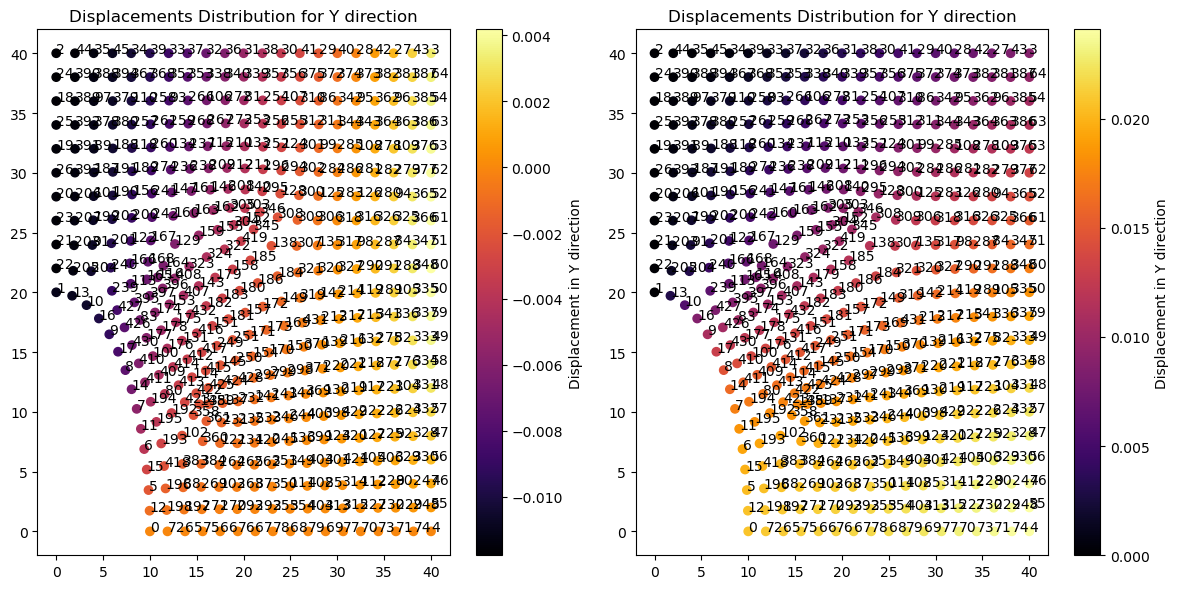

In [36]:

def FEM(a_b, mesh_size, mesh_shape, GPN=2, show=False):
    Load_x = 50  # N/mm
    Load_y = 0  # N/mm
    A = 40  # mm^2
    nodes_coord,  element_nodes = create_mesh(a_b, mesh_shape, mesh_size)
    # with open("Coords/saved_data.pkl", "rb") as file:
    #    nodes_coord,  element_nodes = pickle.load(file)
    # print(nodes_coord, element_nodes)
    nodes_list = Boundary(nodes_coord, a_b)
    element_list = []
    if mesh_shape == 0:
        element_nodes = element_nodes.reshape(-1, 3)
    elif mesh_shape == 1:
        element_nodes = element_nodes.reshape(-1, 4)

    print(element_nodes)
    print(len(element_nodes))
    for ele_lst in element_nodes:
         this_nodes = [
            node for id in ele_lst for node in nodes_list if node.id == id]
         try:
               elem = Q4(this_nodes, GPN=GPN)
         except:
               elem = T3(this_nodes, GPN=GPN)
         elem.a_b = a_b
         element_list.append(elem)
    DOFs = 2*len(nodes_list)
    glo_K = np.zeros((DOFs, DOFs))
    glo_F = np.zeros(DOFs)

    for elem in element_list:  # Assemble Force vector
        loc_F = elem.F
        for i, node_i in enumerate(elem.nodes):
            global_dof = 2 * node_i.id
            if abs(node_i.xy[0]-40) < 1e-3:
                glo_F[global_dof] += Load_x * loc_F[0]
                glo_F[global_dof + 1] += Load_y * loc_F[1]

    for elem in element_list:  # Assemble Stiffness matrix
        loc_K = elem.K
        for i, node_i in enumerate(elem.nodes):
            for j, node_j in enumerate(elem.nodes):
                for dof_i in range(2):  # 每个节点的dof: 0和1
                    for dof_j in range(2):
                        # 计算全局dof的位置
                        global_dof_i = 2 * node_i.id + dof_i
                        global_dof_j = 2 * node_j.id + dof_j

                        # 组装到全局矩阵
                        glo_K[global_dof_i][global_dof_j] += loc_K[2 * i + dof_i][2*j + dof_j]
    for elem in element_list:  # Boundary condition

        for i, node_i in enumerate(elem.nodes):
            for dof_i in range(2):  # 每个节点的dof: 0和1 (x和y方向)
                global_dof_i = 2 * node_i.id + dof_i

                # 检查迪里希莱边界条件
                if node_i.BC[dof_i] == 1:
                    # 修改刚度矩阵和载荷向量
                    # print(node_i.id, global_dof_i, node_i.BC)

                    glo_K[global_dof_i, :] = 0
                    glo_K[:, global_dof_i] = 0
                    glo_K[global_dof_i, global_dof_i] = 1e5  # 大数约束
                    glo_F[global_dof_i] = 0

    np.set_printoptions(precision=2, suppress=True)
    glo_K[np.abs(glo_K) < 1e-5] = 0
    U = np.linalg.solve(glo_K, glo_F)
    # print(U)
    for id in range(len(nodes_list)):
        displacement = np.array([U[id*2], U[id*2+1]])
        nodes_list[id].value = displacement
    for node in nodes_list:
        print(node.id, node.xy,node.value, node.BC, node.type)
    if show == True:

        x_coords = [node.xy[0] for node in nodes_list]
        y_coords = [node.xy[1] for node in nodes_list]
        temperatures_1 = [node.value[1] for node in nodes_list]
        temperatures_2 = [node.value[0] for node in nodes_list]

        # 创建散点图
        # 创建新的图形
        plt.figure(figsize=(12, 6))

        # 创建左侧子图
        plt.subplot(1, 2, 1)
        plt.scatter(x_coords, y_coords, c=temperatures_1, cmap='inferno')
        plt.colorbar(label='Displacement in Y direction')
        plt.title('Displacements Distribution for Y direction')
        for (x, y), node in zip(nodes_coord, nodes_list):
            plt.text(x, y, node.id)  # 在指定的坐标处显示文本

        # 创建右侧子图
        plt.subplot(1, 2, 2)
        plt.scatter(x_coords, y_coords, c=temperatures_2, cmap='inferno')  # 注意这里使用了temperatures_2
        plt.colorbar(label='Displacement in Y direction')
        plt.title('Displacements Distribution for Y direction')
        for (x, y), node in zip(nodes_coord, nodes_list):
            plt.text(x, y, node.id)  # 在指定的坐标处显示文本

        plt.tight_layout()  # 确保子图之间的间距合适
        plt.show()

    return U, nodes_coord, copy.deepcopy(element_list)

U, nodes_list, elements_list = FEM(0.5, 2, 1, 2, True)